# Diamonds Dataset

## Dataset Description

* **Source**: [`ggplot2` R package](https://ggplot2.tidyverse.org/reference/diamonds.html)
* **Task**: Predict the **price** of diamonds based on their physical and quality attributes.

### Dataset Characteristics

* **Observations**: 53,940 diamonds
* **Target Variable**: `price` (in US dollars)

---

### Features

| Feature   | Type        | Description                                                         |
| --------- | ----------- | ------------------------------------------------------------------- |
| `carat`   | Continuous  | Weight of the diamond (numeric, 0.2–5.01)                           |
| `cut`     | Categorical | Quality of the cut: `Fair`, `Good`, `Very Good`, `Premium`, `Ideal` |
| `color`   | Categorical | Diamond color, from J (worst) to D (best)                           |
| `clarity` | Categorical | Measurement of diamond clarity: from `I1` (worst) to `IF` (best)    |
| `depth`   | Continuous  | Total depth percentage = z / mean(x, y)                             |
| `table`   | Continuous  | Width of top of diamond relative to widest point                    |
| `x`       | Continuous  | Length (in mm)                                                      |
| `y`       | Continuous  | Width (in mm)                                                       |
| `z`       | Continuous  | Depth (in mm)                                                       |

---

### Use Cases

* **Regression**: Predicting `price` from physical attributes and quality grades
* **Feature importance** and **encoding strategies** for categorical variables
* **Exploratory Data Analysis (EDA)**: Investigating effects of `cut`, `color`, and `clarity` on price
* **Benchmarking**: Common dataset for testing regression pipelines

---

Let me know if you’d like a summary of correlations or a preprocessing checklist for modeling.


## EDA

In [2]:
# Load diamonds dataset from seaborn
import pandas as pd
path = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/diamonds.csv'
diamonds = pd.read_csv(path)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


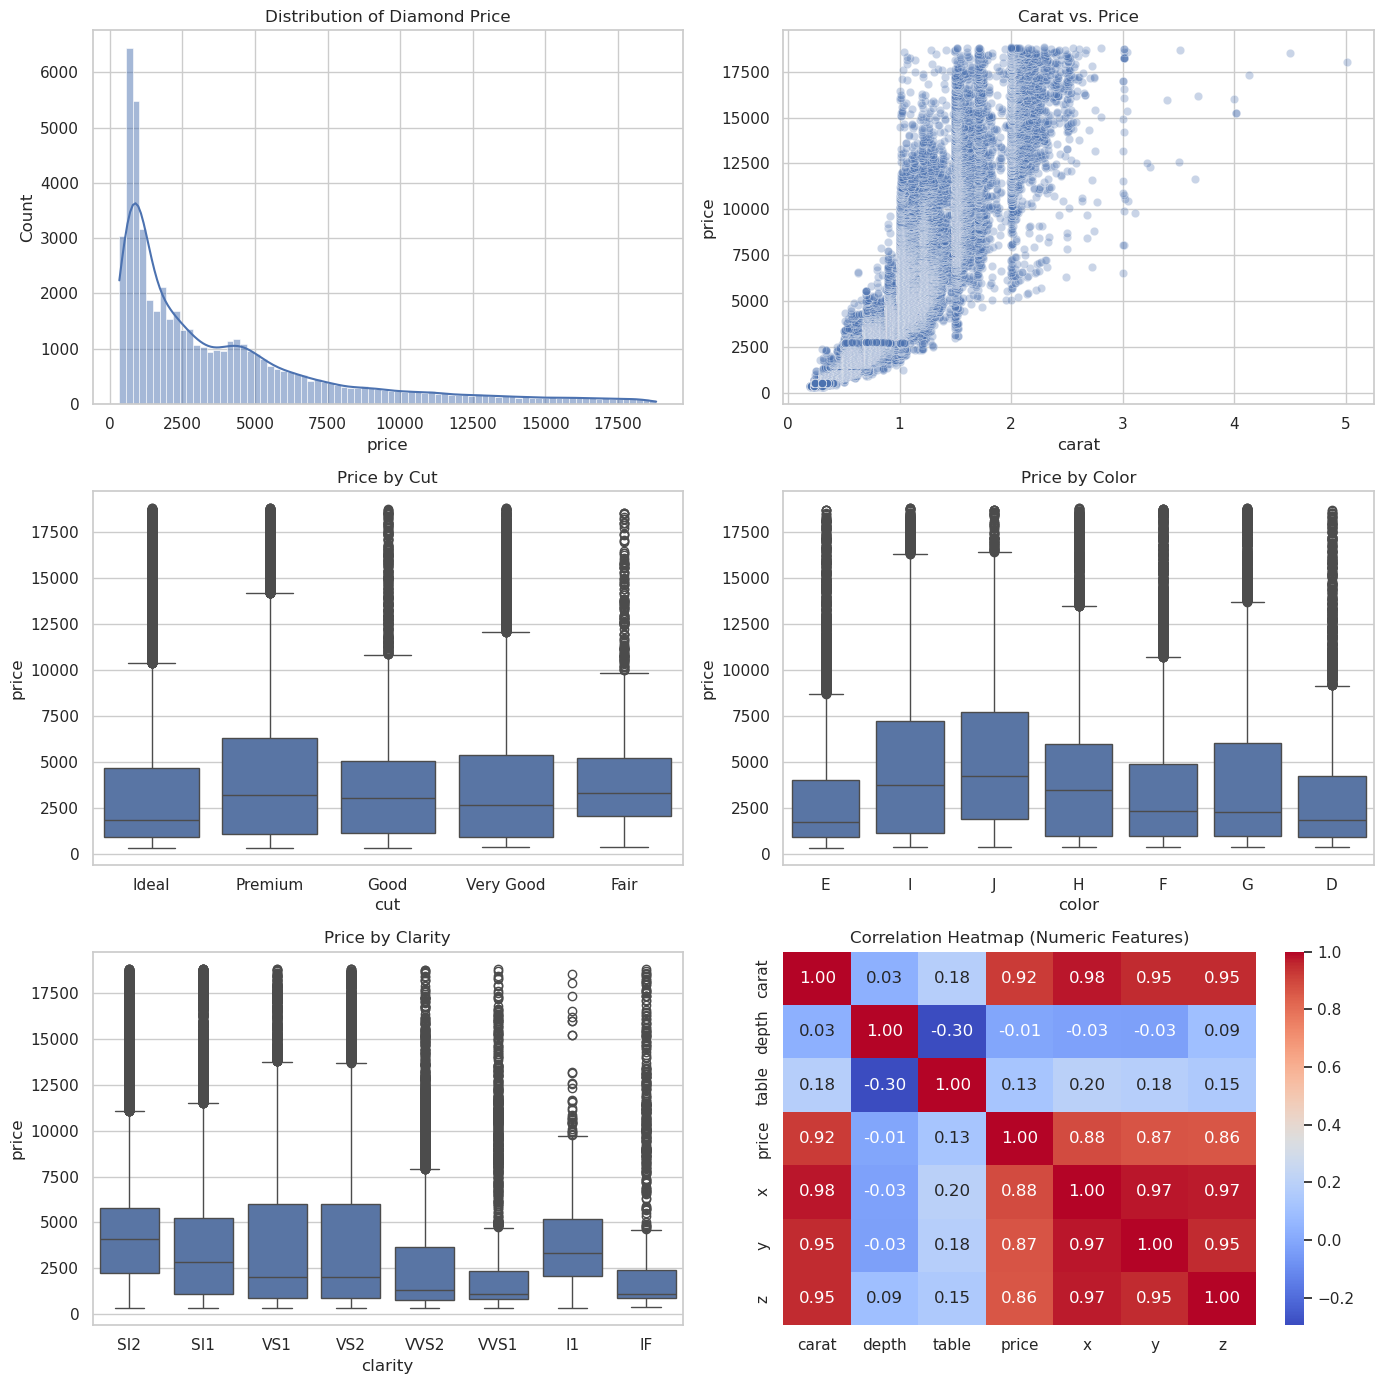

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# 1. Price distribution
sns.histplot(diamonds['price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Diamond Price")

# 2. Carat vs. Price scatter
sns.scatterplot(data=diamonds, x='carat', y='price', alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title("Carat vs. Price")

# 3. Boxplot: Price by Cut
sns.boxplot(data=diamonds, x='cut', y='price', ax=axes[1, 0])
axes[1, 0].set_title("Price by Cut")

# 4. Boxplot: Price by Color
sns.boxplot(data=diamonds, x='color', y='price', ax=axes[1, 1])
axes[1, 1].set_title("Price by Color")

# 5. Boxplot: Price by Clarity
sns.boxplot(data=diamonds, x='clarity', y='price', ax=axes[2, 0])
axes[2, 0].set_title("Price by Clarity")

# 6. Correlation heatmap
numeric_cols = diamonds.select_dtypes(include='number')
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2, 1])
axes[2, 1].set_title("Correlation Heatmap (Numeric Features)")

plt.tight_layout()
plt.show()


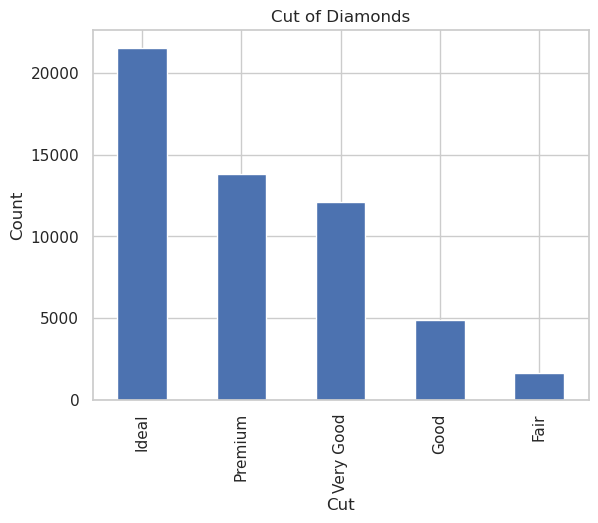

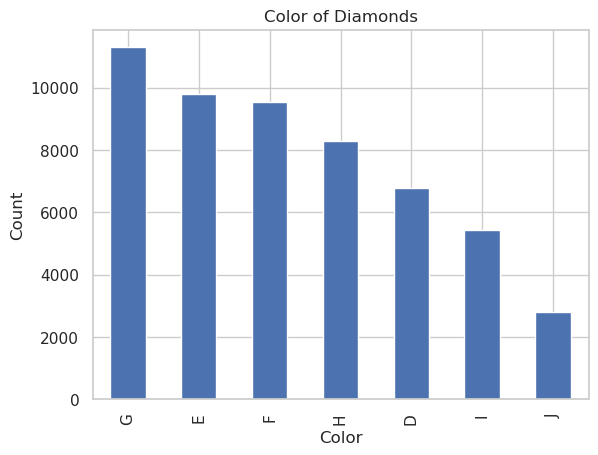

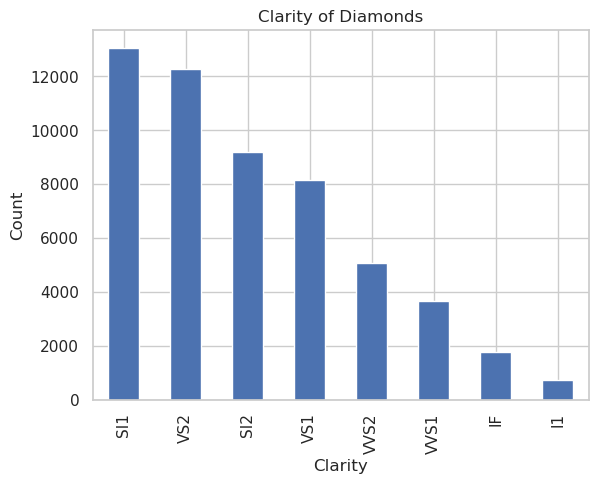

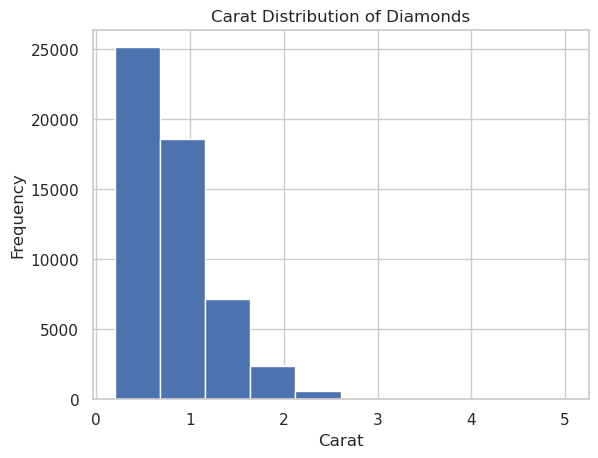

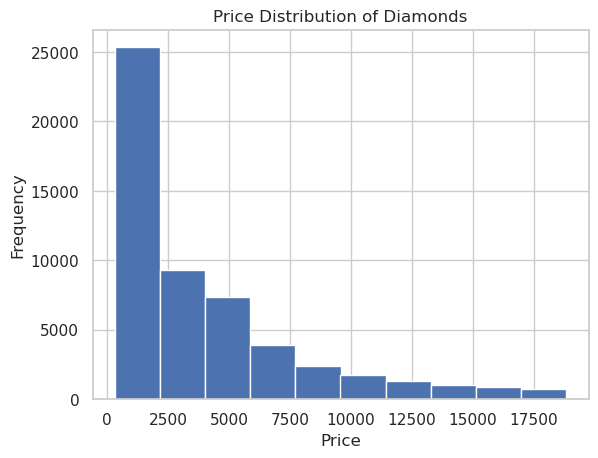

In [4]:
diamonds['cut'].value_counts().plot(kind='bar', title='Cut of Diamonds')
import matplotlib.pyplot as plt
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()
diamonds['color'].value_counts().plot(kind='bar', title='Color of Diamonds')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()
diamonds['clarity'].value_counts().plot(kind='bar', title='Clarity of Diamonds')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.show()
diamonds['carat'].plot(kind='hist', title='Carat Distribution of Diamonds')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()
diamonds['price'].plot(kind='hist', title='Price Distribution of Diamonds')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The code below compares the distribution of diamond prices before and after applying a log transformation. It helps visually explain why and how log transformation is used to handle right-skewed target variables in data preprocessing.

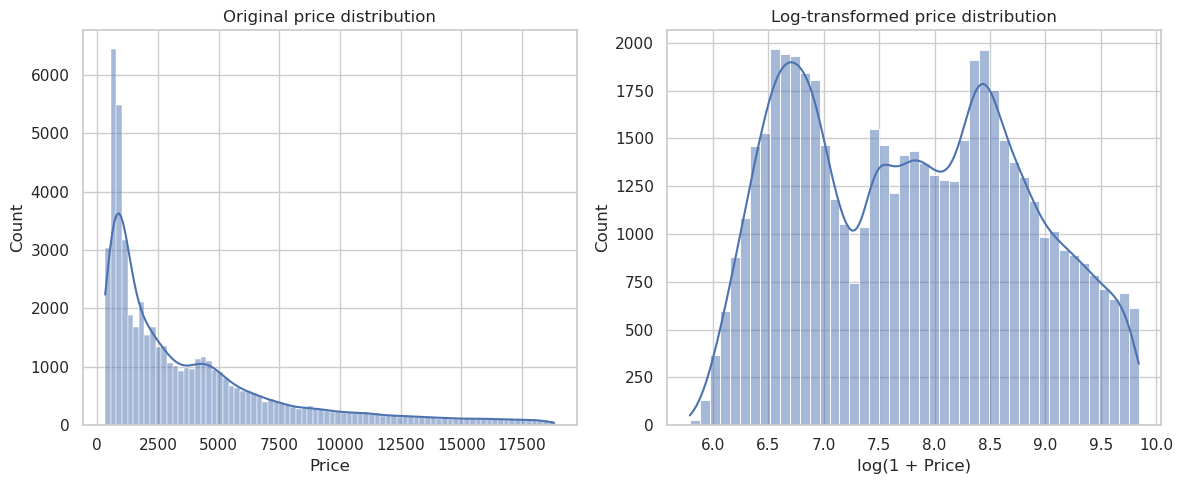

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(diamonds['price'], kde=True)
plt.title("Original price distribution")
plt.xlabel("Price")

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(diamonds['price']), kde=True)
plt.title("Log-transformed price distribution")
plt.xlabel("log(1 + Price)")

plt.tight_layout()
plt.show()

## Class DiamondsDataset

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

class DiamondsDataset:
    def __init__(self, dataframe: pd.DataFrame, target_column: str):
        self.df = dataframe.copy()
        self.target_column = target_column
        self.encoder = None
        self.scaler = None

        self.categorical_cols = ['cut', 'color', 'clarity']
        self.category_orders = [
            ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],  # cut
            ['J', 'I', 'H', 'G', 'F', 'E', 'D'],                # color
            ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # clarity
        ]

    def split_train_test_val(self, test_size=0.2, val_size=0.0, random_state=42):
        X = self.df.drop(columns=[self.target_column])
        y = self.df[self.target_column]

        # First split into temp and test
        X_temp, self.X_test, y_temp, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state)

        if val_size > 0:
            val_relative = val_size / (1 - test_size)
            self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
                X_temp, y_temp, test_size=val_relative, random_state=random_state)
        else:
            self.X_train, self.X_val, self.y_train, self.y_val = X_temp, None, y_temp, None

    def encode_categorical(self):
        self.encoder = OrdinalEncoder(categories=self.category_orders)

        self.X_train[self.categorical_cols] = self.encoder.fit_transform(self.X_train[self.categorical_cols])

        if self.X_val is not None:
            self.X_val[self.categorical_cols] = self.encoder.transform(self.X_val[self.categorical_cols])

        self.X_test[self.categorical_cols] = self.encoder.transform(self.X_test[self.categorical_cols])

    def scale_numeric(self):
        numeric_cols = self.X_train.select_dtypes(include='number').columns.difference([self.target_column])
        self.scaler = StandardScaler()

        self.X_train[numeric_cols] = self.scaler.fit_transform(self.X_train[numeric_cols])

        if self.X_val is not None:
            self.X_val[numeric_cols] = self.scaler.transform(self.X_val[numeric_cols])

        self.X_test[numeric_cols] = self.scaler.transform(self.X_test[numeric_cols])

    def get_train_val_test(self):
        return self.X_train, self.X_val, self.X_test, self.y_train, self.y_val, self.y_test

    def get_encoder(self):
        return self.encoder

    def get_scaler(self):
        return self.scaler


## Data Preprocessing

In [7]:
dataset = DiamondsDataset(diamonds, target_column='price')
dataset.split_train_test_val(test_size=0.2, val_size=0.1)
dataset.encode_categorical()
dataset.scale_numeric()

X_train, X_val, X_test, y_train, y_val, y_test = dataset.get_train_val_test()

In [8]:
X_train.head()  # Display the first few rows of the training set

,carat,cut,color,clarity,depth,table,x,y,z
42852,-0.822109,0.080682,1.526774,1.186032,0.037434,0.243658,-0.843275,-0.857375,-0.831666
25904,2.726309,0.080682,-2.006874,0.578709,-0.381775,0.692097,2.217716,2.229671,2.138361
11684,0.445183,0.977469,-0.828991,-0.635938,-0.521512,-0.653220,0.664910,0.599433,0.561854
46875,-0.568651,0.977469,0.937833,-0.028615,-0.242039,-0.653220,-0.432763,-0.484502,-0.479767
34505,-0.843231,-0.816106,-0.240050,0.578709,-0.172171,0.243658,-0.905744,-0.866047,-0.887970


## Model Training

**TO DO**